# Phase V: INFO 2950 Final Project

## The Impact of Remote Work on AI Job Market Salary Hierarchies

**Author:** Angel Gomez (ag2483)


## Introduction And Relevance

As the AI job market continues to grow, it is particularly interesting to analyze the individuals driving this change and the salaries they are given. The rapid expansion of remote work has transformed how AI professionals work, raising questions about whether traditional salary hierarchies based on experience still hold in remote settings, and whether specialized technical roles command different premiums than generalist positions.

This research aims to identify patterns in salary differences based on experience level, role type, and work arrangement. For recent graduates and career changers, understanding how remote work affects salary progression informs critical decisions about career paths and negotiation strategies. For employers, these insights are essential for structuring competitive compensation in an evolving market where remote work and AI specialization reshape traditional pay structures.


***

### Research Question: 

In the US AI job market, does remote work reduce the salary premium traditionally associated with higher experience levels, and do specialized technical roles (Machine Learning Engineers, Research Scientists) show different patterns compared to generalist roles (Data Scientists, Data Analysts)?

**Important Definitions:**

- **Salary premium:** The percentage increase in compensation as workers advance from entry-level to senior-level positions, calculated as (Senior median salary - Entry median salary) / Entry median salary × 100%
- **Specialized roles:** Positions requiring deep machine learning and AI expertise (e.g., Machine Learning Engineer, Research Scientist, Computer Vision Engineer)
- **Generalist roles:** Broader data science and analytics positions (e.g., Data Scientist, Data Analyst, Data Engineer)

***

**Preview of Findings:**

### Data Description and Cleaning 

## Data Description:

**Overview**: 

This analysis uses surveyed salary data from AI and data science jobs postings from the following sites from 2020 - 2025: 

- aijobs.net Salary Dataset (CC0)
- 365datascience.com
- Payscale
- KDnuggets
- ZipRecruiter
- Wellfound (AngelList)

The raw dataset contains 151,445 global job postings across various AI-related roles and was puiled from Kaggle:

Kaggle Link: https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

**Why was this dataset created?**

This dataset was created to provide insight into and understand global AI job market salary trends and employment patterns. This kind of analysis can help influence people's decision-making processes in the job market.


**Who created/funded this dataset?**

This dataset was independently funded by Adil Shamin and published independently on Kaggle in 2025.

**What do the instances repersent and how many are there??**

Each row represents a single job posting or reported position in the AI/data science field. There are a total of 151,445 instances in the raw dataset and 133,972 in the cleaned dataset.


**What are the attributes?**

- `work_year`: Year the position was posted (2025)
- `experience_level`: Entry, Mid, Senior, or Executive
- `job_title`: Specific role title (e.g., "Machine Learning Engineer")
- `role_type`: Categorized as "Specialized" (ML-focused) or "Generalist" (broader data roles) - *created during cleaning*
- `salary_in_usd`: Annual salary in USD
- `remote_ratio`: Percentage of work that is remote (0%, 50%, or 100%)
- `remote_work`: Binary indicator (0 = on-site, 1 = fully remote) - *created during cleaning*
- `company_size`: Small (S), Medium (M), or Large (L)

**Original Raw Columns:**

work_year, job_title, salary, salary_currency, salary_in_usd, experience_level, employment_type, company_location, company_size, employee_residence, remote_ratio


**What might influence what was observed?**

This dataset was created in 2025, so it captures only a single snapshot without historical context. The data was sourced from specific job boards (ai-jobs.net, ZipRecruiter, Payscale, etc.), meaning jobs posted on other platforms aren't included. The dataset also likely overrepresents major tech hubs where these platforms are more popular. Additionally, posted salary ranges may differ from actual negotiated offers. However, given the large dataset size (151,445 entries), these individual quirks likely have minimal impact on overall patterns.

**Were people notified/did they consent?**

No data collection was done in-person. All data collection was scraped from online job boards. Users who uploaded job postings and shared their information were not directly aware of this specific data collection effort, though the information was publicly posted.


***

## Cleaning

Data cleaning was completed in a seperate and independent notebook 

**Cleaning notebook:** 

https://github.com/ag2483-Angel/INFO2950FinalProject/blob/e0c771f5753df01c8edee05bd276e8d7fa59c1b7/data_cleaning.ipynb

**Explanation of Cleaning**
- Checked for duplicates
- Filtered to US employees only
- Filtered to full-time positions only
- Removed hybrid workers (kept only 0% or 100% remote)
- Created binary `remote_work` variable
- Categorized job titles into Specialized vs Generalist roles
- Mapped experience level codes to readable names
- Removed salary outliers using IQR method
- Selected relevant columns for analysis

### Data Limitations and Strengths


**Limitations**

**Strengths**

### Exploratory Data Analysis:

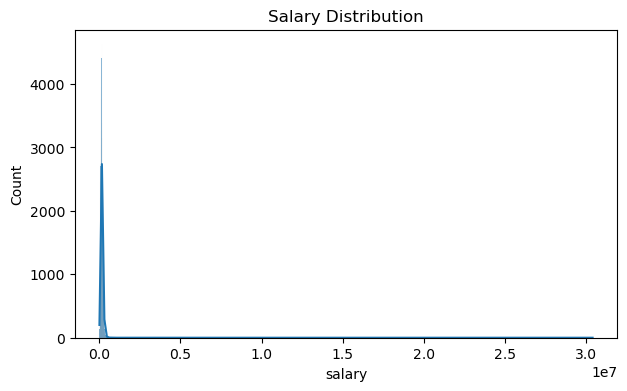

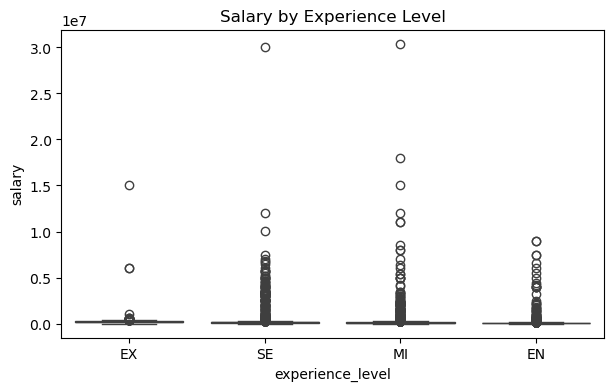

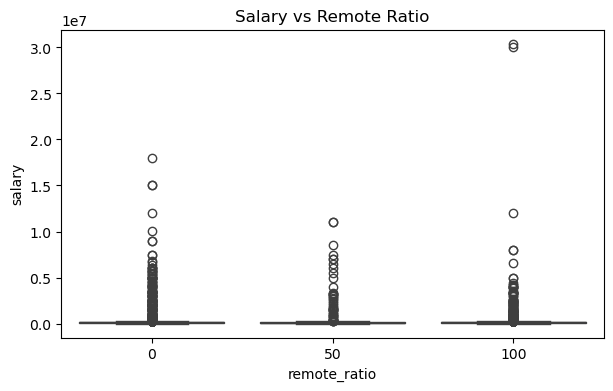

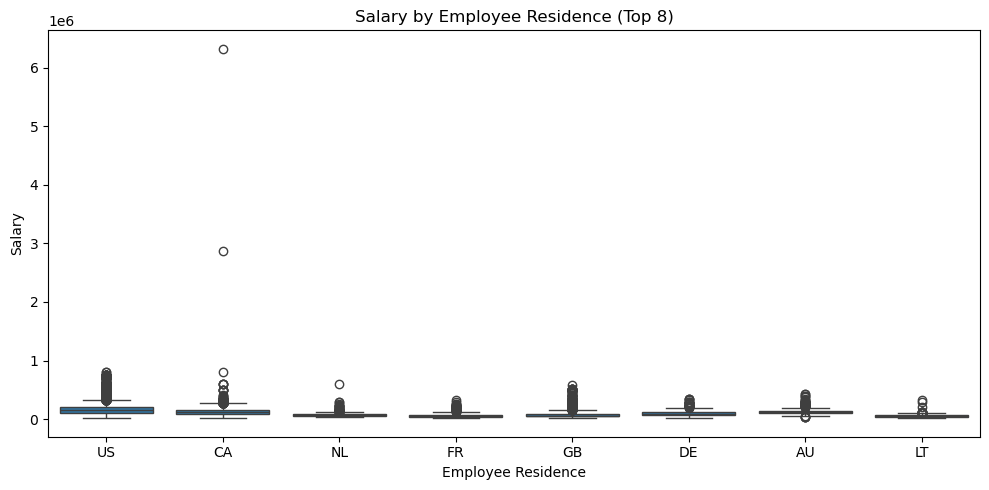


=== Numeric correlation (remote_ratio vs salary) ===
              remote_ratio    salary
remote_ratio      1.000000 -0.004282
salary           -0.004282  1.000000


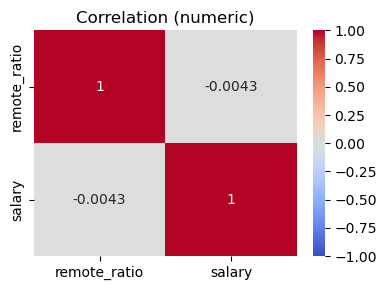


=== Correlation with salary (including one-hot categoricals) ===
salary                   1.000000
employee_residence_IN    0.362670
employee_residence_HU    0.276644
employee_residence_JP    0.273598
experience_level_SE      0.079180
                           ...   
employee_residence_LT   -0.025357
employee_residence_FR   -0.025361
employee_residence_CA   -0.027897
experience_level_MI     -0.045015
employee_residence_GB   -0.068628
Name: salary, Length: 108, dtype: float64


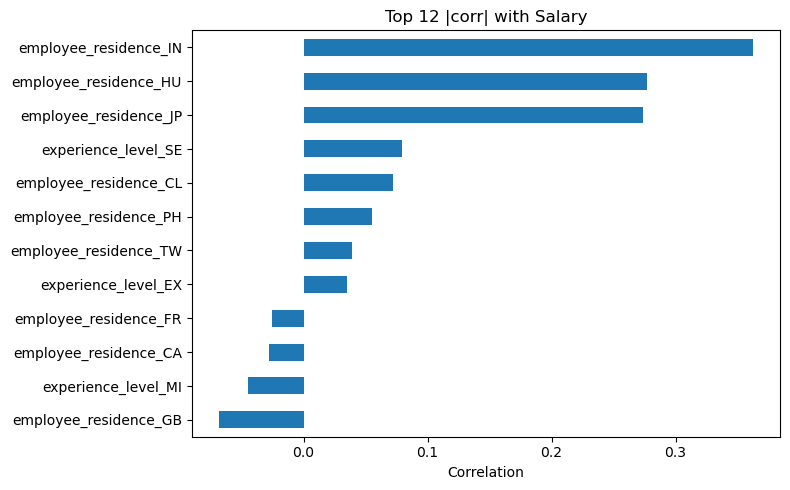


=== Mean salary by experience level ===
experience_level
EX    206387.269998
SE    176919.592484
MI    148689.484153
EN    107164.204860
Name: salary, dtype: float64

=== Mean salary by remote ratio ===
remote_ratio
50     469758.322188
0      162874.003521
100    159500.419641
Name: salary, dtype: float64

=== Mean salary by employee residence (top 10) ===
employee_residence
HU    7.244300e+06
JP    3.960709e+06
IN    1.981984e+06
CL    1.383536e+06
TW    9.208235e+05
PH    6.877071e+05
NO    5.312815e+05
CZ    4.460582e+05
TH    3.866000e+05
QA    3.000000e+05
Name: salary, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# salary distribution
plt.figure(figsize=(7,4))
sns.histplot(new_df['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

# salary by experience level
plt.figure(figsize=(7,4))
sns.boxplot(x='experience_level', y='salary', data=new_df)
plt.title('Salary by Experience Level')
plt.show()

# salary by remote ratio
plt.figure(figsize=(7,4))
sns.boxplot(x='remote_ratio', y='salary', data=new_df)
plt.title('Salary vs Remote Ratio')
plt.show()

# salary by top 8 employee residences, for readability
top_n = 8
top_res = new_df['employee_residence'].value_counts().head(top_n).index
plt.figure(figsize=(10,5))
sns.boxplot(x='employee_residence', y='salary', data=new_df[new_df['employee_residence'].isin(top_res)])
plt.title(f'Salary by Employee Residence (Top {top_n})')
plt.xlabel('Employee Residence')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


# Correlation analysis

# numeric-only correlation (remote_ratio with salary)
corr_num = new_df[['remote_ratio', 'salary']].corr()
print("\n=== Numeric correlation (remote_ratio vs salary) ===")
print(corr_num)

plt.figure(figsize=(4,3))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation (numeric)')
plt.tight_layout()
plt.show()


# encode categoricals to assess correlation with salary
df_encoded = pd.get_dummies(
    new_df,
    columns=['experience_level', 'employee_residence'],
    drop_first=True  
)

corr_all = df_encoded.corr(numeric_only=True)['salary'].sort_values(ascending=False)
print("\n=== Correlation with salary (including one-hot categoricals) ===")
print(corr_all)

# visualize top categorical correlations (absolute value)
corr_no_salary = corr_all.drop('salary')
top_k = 12
top_corr = corr_no_salary.abs().sort_values(ascending=False).head(top_k).index
plt.figure(figsize=(8,5))
corr_no_salary.loc[top_corr].sort_values().plot(kind='barh')
plt.title(f'Top {top_k} |corr| with Salary')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

# grouped means, how salary changes across factor levels
mean_by_exp = new_df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)
mean_by_remote = new_df.groupby('remote_ratio')['salary'].mean().sort_values(ascending=False)
mean_by_res = new_df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)

print("\n=== Mean salary by experience level ===")
print(mean_by_exp)
print("\n=== Mean salary by remote ratio ===")
print(mean_by_remote.head(10))
print("\n=== Mean salary by employee residence (top 10) ===")
print(mean_by_res.head(10))

### Questions for Reviewers:
 - Are our variables of remote_ratio, experience_level, and employee_residence in effecting salary appropriate or are others needed as well?
 - Does our data cleaning work including filtering and encoding sufficently prepare the dataset for correct analysis work?
 - For the next phases would it be important at this current phase to add a linear regression on salary model?